# Рубежный контроль№2
## Задача 2. Кластеризация данных.
### Попов М.А., ИУ5-63, 13 вариант
#### Кластеризуйте данные с помощью двух алгоритмов кластеризации: K-Means (k-means++) и Birch

##### Датасет: FiveThirtyEight Comic Characters Dataset

In [237]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import silhouette_score
from itertools import cycle, islice
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [238]:
data = pd.read_csv('marvel-wikia-data.csv')

In [239]:
data.shape

(16376, 13)

In [240]:
data.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

In [241]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


## Преобразование категориальных признаков в числовые

In [242]:
data['ID'].value_counts()

Secret Identity                  6275
Public Identity                  4528
No Dual Identity                 1788
Known to Authorities Identity      15
Name: ID, dtype: int64

In [243]:
data['EYE'].value_counts()

Blue Eyes          1962
Brown Eyes         1924
Green Eyes          613
Black Eyes          555
Red Eyes            508
White Eyes          400
Yellow Eyes         256
Grey Eyes            95
Hazel Eyes           76
Variable Eyes        49
Purple Eyes          31
Orange Eyes          25
One Eye              21
Pink Eyes            21
Gold Eyes            14
Silver Eyes          12
Violet Eyes          11
Amber Eyes           10
No Eyes               7
Multiple Eyes         7
Yellow Eyeballs       6
Black Eyeballs        3
Magenta Eyes          2
Compound Eyes         1
Name: EYE, dtype: int64

In [244]:
data['HAIR'].value_counts()

Black Hair               3755
Brown Hair               2339
Blond Hair               1582
No Hair                  1176
Bald                      838
White Hair                754
Red Hair                  620
Grey Hair                 531
Green Hair                117
Auburn Hair                78
Blue Hair                  56
Strawberry Blond Hair      47
Purple Hair                47
Orange Hair                43
Variable Hair              32
Pink Hair                  31
Yellow Hair                20
Silver Hair                16
Gold Hair                   8
Reddish Blond Hair          6
Light Brown Hair            6
Magenta Hair                5
Orange-brown Hair           3
Bronze Hair                 1
Dyed Hair                   1
Name: HAIR, dtype: int64

In [245]:
data['SEX'].value_counts()

Male Characters           11638
Female Characters          3837
Agender Characters           45
Genderfluid Characters        2
Name: SEX, dtype: int64

In [246]:
data['ALIGN'].value_counts()

Bad Characters        6720
Good Characters       4636
Neutral Characters    2208
Name: ALIGN, dtype: int64

In [247]:
data['ID']=data.ID.replace({'Secret Identity':0,'Public Identity':1,'No Dual Identity':2,'Known to Authorities Identity':3}) 

In [248]:
data['EYE']=data.EYE.replace({'Hazel Eyes':0,'Blue Eyes':1,'Brown Eyes':2,'Green Eyes':3,'Yellow Eyes':4,
                              'Gold Eyes':5,'Red Eyes':6,'Black Eyeballs':7,'White Eyes':8,'Variable Eyes':9,
                              'Purple Eyes':10,'Orange Eyes':11,'One Eye':12,'Pink Eyes':13,'Silver Eyes':14,
                              'Violet Eyes':15,'Amber Eyes':16,'No Eyes':17,
                              'Multiple Eyes':18,'Yellow Eyeballs':19,'Magenta Eyes':20,'Compound Eyes':21,'Black Eyes':22,
                              'Grey Eyes':23}) 

In [249]:
data['HAIR']=data.HAIR.replace({'Black Hair':0,'Brown Hair':1,'Blond Hair':2,'No Hair':3,'Bald':4,
                              'White Hair':5,'Red Hair':6,'Grey Hair':7,'Green Hair':8,'Auburn Hair':9,
                              'Blue Hair':10,'Strawberry Blond Hair':11,'Purple Hair':12,'Orange Hair':13,'Variable Hair':14,
                              'Pink Hair':15,'Yellow Hair':16,'Silver Hair':17,
                              'Gold Hair':18,'Reddish Blond Hair':19,'Light Brown Hair':20,'Magenta Hair':21
                               ,'Orange-brown Hair':22,'Bronze Hair':23,
                              'Dyed Hair':24}) 

In [250]:
data['SEX']=data.SEX.replace({'Male Characters':0,'Female Characters':1,'Agender Characters':2,'Genderfluid Characters':3}) 

In [251]:
data['ALIGN']=data.ALIGN.replace({'Bad Characters':0,'Good Characters':1,'Neutral Characters':2}) 

In [252]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),0.0,1.0,0.0,1.0,0.0,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),1.0,1.0,1.0,5.0,0.0,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),1.0,2.0,1.0,0.0,0.0,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),1.0,1.0,1.0,0.0,0.0,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),2.0,1.0,1.0,2.0,0.0,NaN,Living Characters,2258.0,Nov-50,1950.0


In [253]:
X=data[['ID']+['ALIGN']+['EYE']+['HAIR']+['SEX']+['Year']]

In [254]:
X.isnull().sum()

ID       3770
ALIGN    2812
EYE      9767
HAIR     4264
SEX       854
Year      815
dtype: int64

In [255]:
X = X.dropna(axis=0, how='any')
X.head()

,ID,ALIGN,EYE,HAIR,SEX,Year
0,0.0,1.0,0.0,1.0,0.0,1962.0
1,1.0,1.0,1.0,5.0,0.0,1941.0
2,1.0,2.0,1.0,0.0,0.0,1974.0
3,1.0,1.0,1.0,0.0,0.0,1963.0
4,2.0,1.0,1.0,2.0,0.0,1950.0


In [256]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Метод k-средних

In [257]:
from sklearn.cluster import KMeans, MiniBatchKMeans

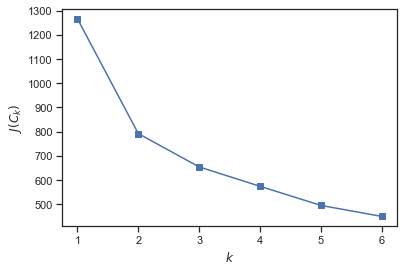

In [258]:
inertia = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(1, 7), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [259]:
inertia = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=1).fit_predict(X) 
    inertia.append((silhouette_score(X, kmeans),k))
inertia

[(0.5289889493380728, 2),
 (0.4363650459097957, 3),
 (0.4270223075694646, 4),
 (0.4744469200509466, 5),
 (0.43944483490714253, 6),
 (0.45888433061319533, 7),
 (0.3934651633681706, 8),
 (0.3990918796257324, 9),
 (0.3739790818749283, 10),
 (0.38213162853169125, 11),
 (0.38335090970134483, 12),
 (0.34250701459477145, 13),
 (0.3352521554167912, 14)]

### Выберем число кластеров 2

In [260]:
%time result_KMeans_2 =  KMeans(n_clusters=2, init='k-means++').fit_predict(X)

Wall time: 99.8 ms


In [261]:
silhouette_score(X, result_KMeans_2)

0.5289889493380728

## Алгоритм BIRCH

In [262]:
from sklearn.cluster import Birch

In [263]:
result_Birch = Birch().fit_predict(X)
silhouette_score(X, result_Birch)

0.48834225067247017

In [264]:
%time result_Birch = Birch(n_clusters=2).fit_predict(X)

Wall time: 973 ms


In [265]:
silhouette_score(X, result_Birch)

0.5143488780547314

# Вывод: Значение метрики чуть больше у метода k-средних.